# Exercise 5.3 | Numerical Control Variables

**Pittsburgh Housing Prices**

In this exercise, we'll explore how to use numerical control variables to isolate the effect of house size on prices.

In [ ]:
# Imports
import pandas as pd
import statsmodels.formula.api as smf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# File Path
file_path = 'https://tayweid.github.io/econ-0150/parts/'

## Step 1: Load and Explore the Data

In [ ]:
# Load the data
data = pd.read_csv(file_path + 'pgh_housing_small.csv', index_col=0)

# Display the data
data.head()

,PARID,PROPERTYZIP,SALEDATE,SALEPRICE,STORIES,YEARBLT,TOTALROOMS,BEDROOMS,FULLBATHS,HALFBATHS,FINISHEDLIVINGAREA,LOGPRICE
296306,1202H00136000000,15143,9/10/13,530960.0,2.0,2013.0,11.0,5.0,3.0,1.0,4435.0,13.182442
125627,0382E00004000000,15132,12/31/79,3500.0,2.0,1925.0,8.0,4.0,2.0,0.0,2228.0,8.160518
45045,0088S00003000000,15217,11/21/14,655000.0,2.0,2014.0,6.0,3.0,2.0,1.0,2976.0,13.392391
171940,0299B00100000000,15221,5/31/18,200000.0,2.0,1928.0,6.0,3.0,1.0,1.0,2218.0,12.206073
265608,0316R00212000000,15236,10/15/87,52000.0,1.0,1954.0,5.0,3.0,1.0,0.0,900.0,10.858999


## Step 2: Modeling Relationships Separately

Let's first look at how living area and year built relate to price **separately**.

Text(0, 0.5, 'Log Price')

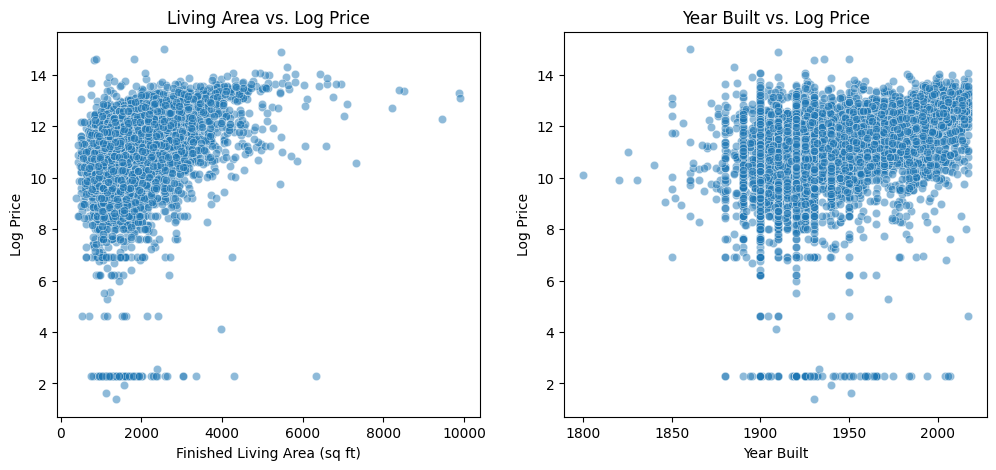

In [38]:
# Create side-by-side scatter plots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Living area vs log price
sns.scatterplot(data=data, x='FINISHEDLIVINGAREA', y='LOGPRICE', alpha=0.5, ax=ax1)
ax1.set_title('Living Area vs. Log Price')
ax1.set_xlabel('Finished Living Area (sq ft)')
ax1.set_ylabel('Log Price')

# Year built vs log price
sns.scatterplot(data=data, x='YEARBLT', y='LOGPRICE', alpha=0.5, ax=ax2)
ax2.set_title('Year Built vs. Log Price')
ax2.set_xlabel('Year Built')
ax2.set_ylabel('Log Price')

In [39]:
# Model 1: Living area only
model_area = smf.ols('LOGPRICE ~ FINISHEDLIVINGAREA', data=data).fit()
print("Model 1: Living Area Only")
print(model_area.summary().tables[1])
print()

Model 1: Living Area Only
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             10.2029      0.031    328.476      0.000      10.142      10.264
FINISHEDLIVINGAREA     0.0005   1.65e-05     33.260      0.000       0.001       0.001



In [40]:
# Model 2: Year built only
model_year = smf.ols('LOGPRICE ~ YEARBLT', data=data).fit()
print("Model 2: Year Built Only")
print(model_year.summary().tables[1])

Model 2: Year Built Only
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -20.5949      0.765    -26.906      0.000     -22.095     -19.095
YEARBLT        0.0163      0.000     41.466      0.000       0.016       0.017


### Question 1
What is the slope coefficient for `FINISHEDLIVINGAREA` in Model 1? What does it mean?

**Your answer:**

## Step 3: Are Living Area and Year Built Correlated?

If these two variables are correlated, we might have a confounding problem.

Text(0, 0.5, 'Year Built')

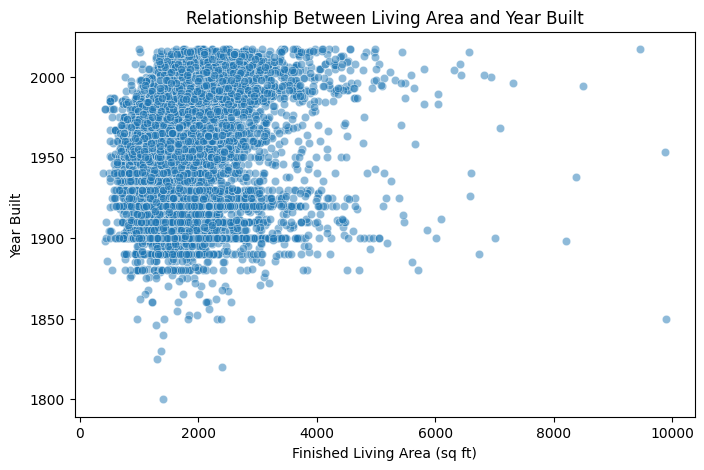

In [41]:
# Plot the relationship between living area and year built
plt.figure(figsize=(8, 5))
sns.scatterplot(data=data, x='FINISHEDLIVINGAREA', y='YEARBLT', alpha=0.5)
plt.title('Relationship Between Living Area and Year Built')
plt.xlabel('Finished Living Area (sq ft)')
plt.ylabel('Year Built')

### Question 2
Are larger homes built more recently or longer ago? What does this mean for our Model 1 estimate?

**Your answer:**

## Step 4: Multiple Regression with Control Variable

Now let's add year built as a **control variable** to isolate the pure effect of living area.

In [42]:
# Model 3: Both variables (with control)
model_both = smf.ols('LOGPRICE ~ FINISHEDLIVINGAREA + YEARBLT', data=data).fit()
print("Model 3: With Year Built Control")
print(model_both.summary().tables[1])

Model 3: With Year Built Control
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept            -17.9337      0.741    -24.213      0.000     -19.386     -16.482
FINISHEDLIVINGAREA     0.0005   1.56e-05     29.095      0.000       0.000       0.000
YEARBLT                0.0145      0.000     38.018      0.000       0.014       0.015


### Question 3
Compare the coefficient on `FINISHEDLIVINGAREA` in Model 1 vs. Model 3. Did it increase or decrease? Why?

**Your answer:**

### Question 4
In your own words, what does "holding year built constant" mean in this context?

**Your answer:**

In [33]:
# Compare R-squared values
print("Model Comparison:")
print("="*60)
print(f"Model 1 (Area Only):           R² = {model_area.rsquared:.4f}")
print(f"Model 3 (Area + Year Control): R² = {model_both.rsquared:.4f}")
print(f"Improvement in R²:             {model_both.rsquared - model_area.rsquared:.4f}")
print("="*60)

Model Comparison:
Model 1 (Area Only):           R² = 0.0996
Model 3 (Area + Year Control): R² = 0.2134
Improvement in R²:             0.1137


## Step 5: Checking Residuals

Let's check if adding the control variable improved our model by examining the residuals.

Text(0.5, 1.0, 'Model 3: With Year Built Control')

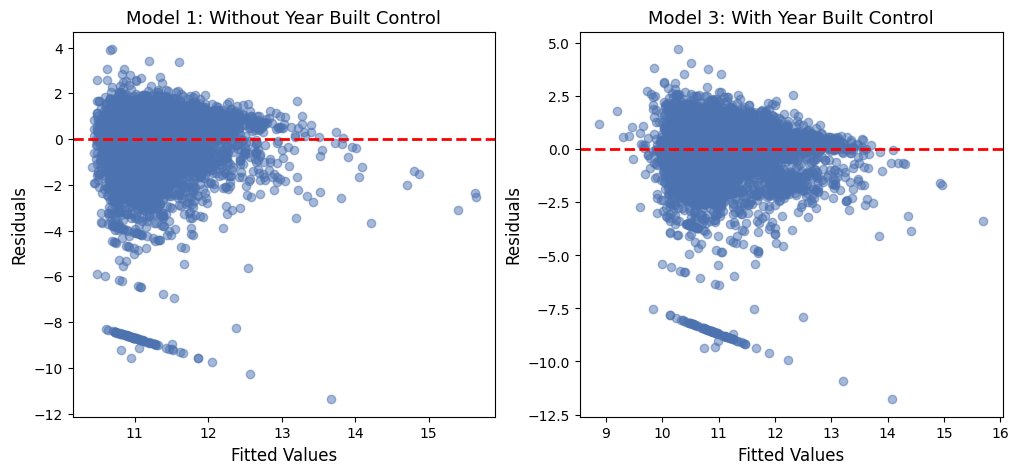

In [34]:
# Create residual plots for both models
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Model 1: Without control
residuals_area = model_area.resid
predictions_area = model_area.fittedvalues
ax1.scatter(predictions_area, residuals_area, alpha=0.5, color='#4C72B0')
ax1.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax1.set_xlabel('Fitted Values', fontsize=12)
ax1.set_ylabel('Residuals', fontsize=12)
ax1.set_title('Model 1: Without Year Built Control', fontsize=13)

# Model 3: With control
residuals_both = model_both.resid
predictions_both = model_both.fittedvalues
ax2.scatter(predictions_both, residuals_both, alpha=0.5, color='#4C72B0')
ax2.axhline(y=0, color='red', linestyle='--', linewidth=2)
ax2.set_xlabel('Fitted Values', fontsize=12)
ax2.set_ylabel('Residuals', fontsize=12)
ax2.set_title('Model 3: With Year Built Control', fontsize=13)

### Question 5
Looking at the residual plots, does adding the year built control appear to improve the model? What about the R² values?

**Your answer:**